/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2390 - mae: 0.2432 - val_loss: 0.0779 - val_mae: 0.1632
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0420 - mae: 0.1280 - val_loss: 0.0107 - val_mae: 0.0789
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0091 - mae: 0.0736 - val_loss: 0.0074 - val_mae: 0.0666
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0075 - mae: 0.0667 - val_loss: 0.0072 - val_mae: 0.0653
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - mae: 0.0662 - val_loss: 0.0070 - val_mae: 0.0650
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0071 - mae: 0.0654 - val_loss: 0.0069 - val_mae: 0.0645
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - mae: 0.0654 - val_loss: 0.0069 - val_mae: 0.0641
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 - mae: 0.0648 - val_loss: 0.0068 - val_mae: 0.0638
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0070 - m

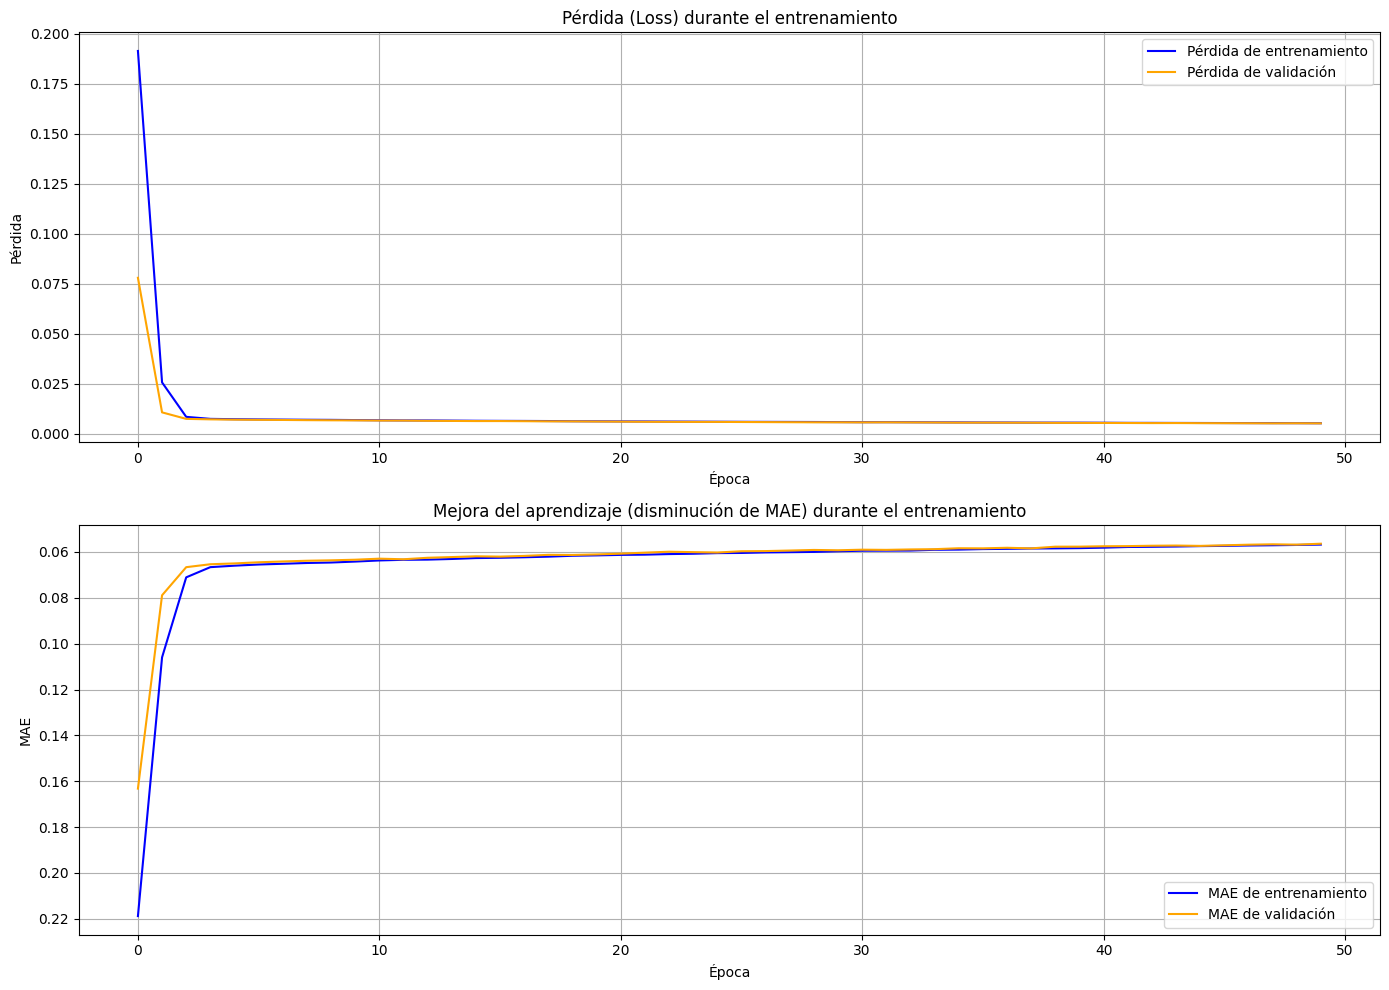

Arquitectura de la red:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 129)                 │           8,385 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,845 (390.02 KB)

 Trainable params: 33,281 (130.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,564 (260.02 KB)


Hiperparámetros:
Número de muestras: 1000
Longitud de la señal: 1024
Varianza del ruido: 0.1
Tamaño del conjunto de prueba: 0.2
Épocas: 50
Tasa de aprendizaje: 0.001


In [ ]:
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Parámetros
num_samples = 1000  # Número de muestras
signal_length = 1024  # Longitud de cada señal
noise_variance = 0.1  # Varianza del ruido
test_size = 0.2  # Proporción del conjunto de prueba
epochs = 50  # Número de épocas de entrenamiento
learning_rate = 0.001  # Tasa de aprendizaje

# Generar señal X(t) y ruido N
X_t = np.sin(np.linspace(0, 2 * np.pi, signal_length))  # Señal ejemplo: sinusoide
N = np.random.randn(num_samples, signal_length) * np.sqrt(noise_variance)  # Ruido gaussiano

# Matriz de entrada: X(t) + N
signals = X_t + N

# Calcular el PSD usando Welch
fs = 1.0  # Frecuencia de muestreo
psd_data = np.array([welch(signal, fs=fs, nperseg=256)[1] for signal in signals])

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(psd_data, psd_data, test_size=test_size, random_state=42)

# Crear el modelo de la red neuronal
model = Sequential([
    Dense(128, activation='relu', input_shape=(psd_data.shape[1],)),  # Capa de entrada
    Dense(64, activation='relu'),  # Capa oculta
    Dense(psd_data.shape[1], activation='linear')  # Capa de salida
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

# Entrenar la red
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Graficar el rendimiento
plt.figure(figsize=(14, 10))

# Pérdida (Loss) - Decremento
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de validación', color='orange')
plt.title('Pérdida (Loss) durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

# Error absoluto medio (MAE) - Aprendizaje Ascendente (Invertir eje y)
plt.subplot(2, 1, 2)
plt.plot(history.history['mae'], label='MAE de entrenamiento', color='blue')
plt.plot(history.history['val_mae'], label='MAE de validación', color='orange')
plt.title('Mejora del aprendizaje (disminución de MAE) durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.gca().invert_yaxis()  # Invertir eje y para mostrar de manera ascendente el aprendizaje
plt.grid(True)

plt.tight_layout()
plt.show()

# Información adicional de los entregables
print("Arquitectura de la red:")
model.summary()

print("\nHiperparámetros:")
print(f"Número de muestras: {num_samples}")
print(f"Longitud de la señal: {signal_length}")
print(f"Varianza del ruido: {noise_variance}")
print(f"Tamaño del conjunto de prueba: {test_size}")
print(f"Épocas: {epochs}")
print(f"Tasa de aprendizaje: {learning_rate}")


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

: 

In [ ]:
M = 1024 #Puntos en la señal
N = 1000 #Numero de señales
T = 3 #Duración de la señal
fs = M/T #frecuencia de muestreo

In [ ]:
t = np.linspace(0, T, M) #vector tiempo

In [ ]:
# Función que genera la señal periódica
def senal():
    # Frecuencias en Hz
    frecuencia1 = 1
    frecuencia2 = 3
    frecuencia3 = 5

    wo = 2 * np.pi

    # Amplitudes
    Amplitud1 = 1
    Amplitud2 = 1 / 3
    Amplitud3 = 1 / 5

    senal = (Amplitud1 * np.cos(wo * frecuencia1 * t) -
             Amplitud2 * np.sin(wo * frecuencia2 * t) +
             Amplitud3 * np.cos(wo * frecuencia3 * t))

    return senal

In [ ]:
# Función que genera ruido blanco gaussiano
def noise(media, nivel_de_ruido, tamaño):
    ruido = np.random.normal(media, nivel_de_ruido, size=M)
    return ruido

In [ ]:
# Función que calcula el psd usando welch
def calcular_psd(senal, fs, nperseg):
    f, Pxx_den = welch(senal, fs=fs, nperseg=nperseg)
    return f, Pxx_den

In [ ]:
# Se crean las señales de ejemplo
x = senal()                      # Señal sin ruido
x1 = senal() + noise(0, 0.1, M)  # señal con nivel de ruido 0.1
x2 = senal() + noise(0, 0.3, M)  # señal con nivel de ruido 0.3
x3 = senal() + noise(0, 1, M)    # señal con nivel de ruido 1

In [ ]:
# Se calcula el psd de las señales creadas usando la función de welch
f, Pxx_x = calcular_psd(x, fs, M)
f1, Pxx_x1 = calcular_psd(x1, fs, M)
f2, Pxx_x2 = calcular_psd(x2, fs, M)
f3, Pxx_x3 = calcular_psd(x3, fs, M)

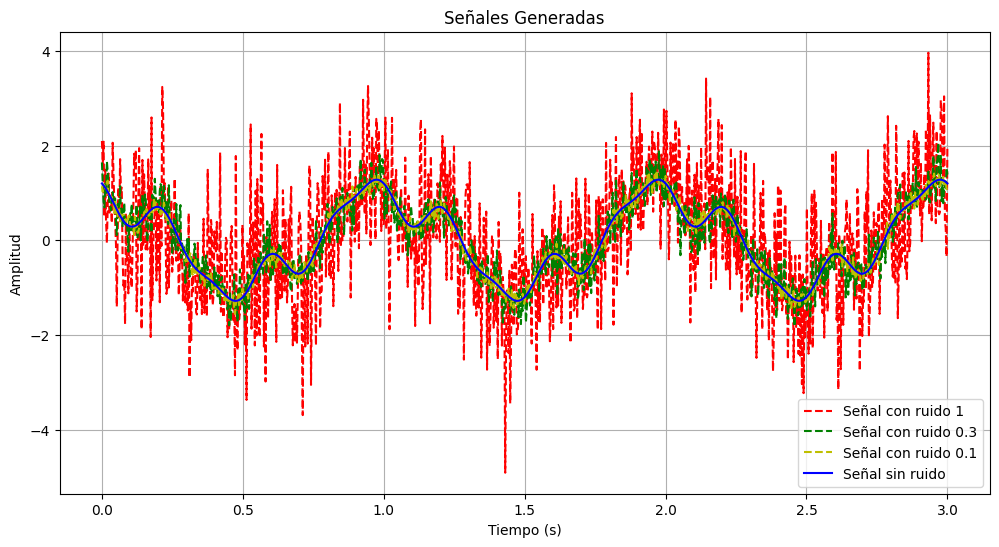

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, x3, 'r', label = 'Señal con ruido 1', linestyle = '--')
plt.plot(t, x2, 'g', label = 'Señal con ruido 0.3', linestyle = '--')
plt.plot(t, x1, 'y',label = 'Señal con ruido 0.1', linestyle = '--')
plt.plot(t, x, 'b', label = 'Señal sin ruido', linewidth=1.5)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señales Generadas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Se calcula el psd de las señales creadas usando la función de welch
f, Pxx_x = calcular_psd(x, fs, M)
f1, Pxx_x1 = calcular_psd(x1, fs, M)
f2, Pxx_x2 = calcular_psd(x2, fs, M)
f3, Pxx_x3 = calcular_psd(x3, fs, M)

<ipython-input-12-95e65c786bae>:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9,0)


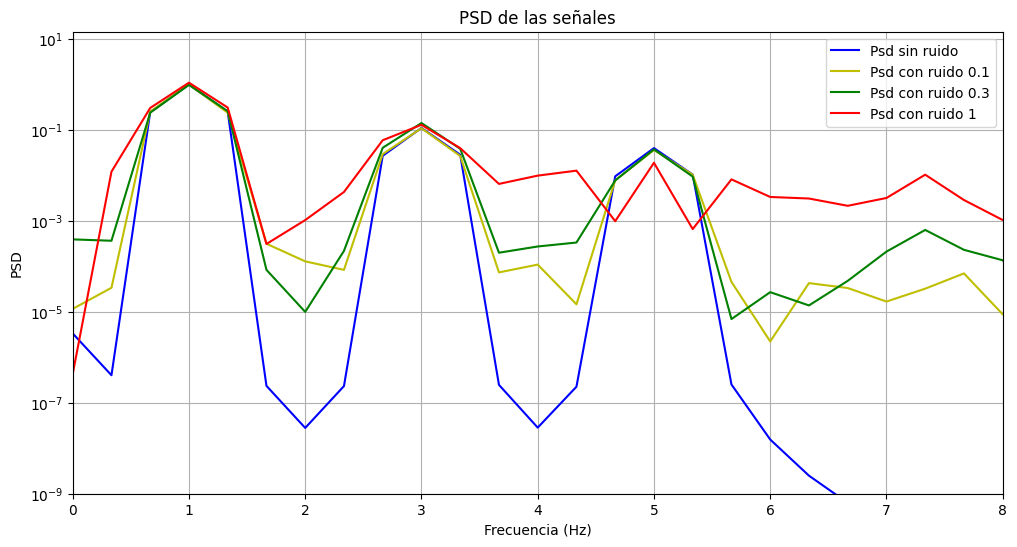

In [ ]:
plt.figure(figsize=(12, 6))
plt.semilogy(f,Pxx_x, 'b', label = 'Psd sin ruido')
plt.semilogy(f1,Pxx_x1, 'y', label = 'Psd con ruido 0.1')
plt.semilogy(f2,Pxx_x2, 'g', label = 'Psd con ruido 0.3')
plt.semilogy(f3,Pxx_x3, 'r',  label = 'Psd con ruido 1')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.title('PSD de las señales')
plt.legend()
plt.grid(True)
plt.xlim(0,8)
plt.ylim(10**-9,0)
plt.show()

Primer armónico en señal sin ruido: Frecuencia = 0.67 Hz, Potencia = 2.48e-01 V^2/Hz
Primer armónico en señal con ruido 0.1: Frecuencia = 0.67 Hz, Potencia = 2.41e-01 V^2/Hz
Primer armónico en señal con ruido 0.3: Frecuencia = 0.67 Hz, Potencia = 2.47e-01 V^2/Hz
Primer armónico en señal con ruido 1: Frecuencia = 0.67 Hz, Potencia = 2.48e-01 V^2/Hz


<ipython-input-13-3274e089565b>:75: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9, 0)


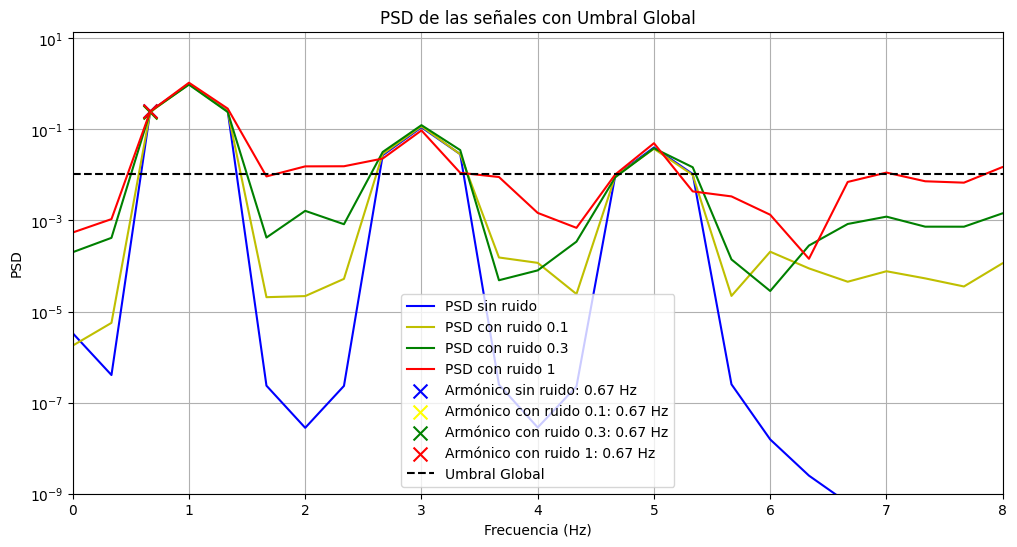

In [ ]:
# Función para calcular un único umbral global usando todas las señales
def calcular_umbral_global(*Pxx_dens):
    # Concatenar todas las densidades espectrales
    Pxx_concatenado = np.concatenate(Pxx_dens)

    # Calcular el umbral utilizando un percentil alto, por ejemplo 95
    umbral = np.percentile(Pxx_concatenado, 95)
    return umbral

# Se crean las señales de ejemplo
x = senal()                      # Señal sin ruido
x1 = senal() + noise(0, 0.1, M)  # Señal con nivel de ruido 0.1
x2 = senal() + noise(0, 0.3, M)  # Señal con nivel de ruido 0.3
x3 = senal() + noise(0, 1, M)    # Señal con nivel de ruido 1

# Se calcula el PSD de las señales creadas usando la función de Welch
f, Pxx_x = calcular_psd(x, fs, M)
f1, Pxx_x1 = calcular_psd(x1, fs, M)
f2, Pxx_x2 = calcular_psd(x2, fs, M)
f3, Pxx_x3 = calcular_psd(x3, fs, M)

# Calcular un umbral global basado en todas las señales
umbral_global = calcular_umbral_global(Pxx_x, Pxx_x1, Pxx_x2, Pxx_x3)

# Función para detectar el primer armónico que supera el umbral global
def detectar_primer_armonico(f, Pxx_den, umbral):
    armonic_indices = np.where(Pxx_den > umbral)[0]
    if len(armonic_indices) > 0:
        primer_armonico_indice = armonic_indices[0]
        frecuencia_primer_armonico = f[primer_armonico_indice]
        potencia_primer_armonico = Pxx_den[primer_armonico_indice]
        return frecuencia_primer_armonico, potencia_primer_armonico
    else:
        return None, None

# Detección del primer armónico en cada señal usando el umbral global y guardar la frecuencia y potencia
frecuencia_armonico_x, potencia_armonico_x = detectar_primer_armonico(f, Pxx_x, umbral_global)
frecuencia_armonico_x1, potencia_armonico_x1 = detectar_primer_armonico(f1, Pxx_x1, umbral_global)
frecuencia_armonico_x2, potencia_armonico_x2 = detectar_primer_armonico(f2, Pxx_x2, umbral_global)
frecuencia_armonico_x3, potencia_armonico_x3 = detectar_primer_armonico(f3, Pxx_x3, umbral_global)

# Mostrar las frecuencias y potencias de los primeros armónicos detectados
print(f"Primer armónico en señal sin ruido: Frecuencia = {frecuencia_armonico_x:.2f} Hz, Potencia = {potencia_armonico_x:.2e} V^2/Hz")
print(f"Primer armónico en señal con ruido 0.1: Frecuencia = {frecuencia_armonico_x1:.2f} Hz, Potencia = {potencia_armonico_x1:.2e} V^2/Hz")
print(f"Primer armónico en señal con ruido 0.3: Frecuencia = {frecuencia_armonico_x2:.2f} Hz, Potencia = {potencia_armonico_x2:.2e} V^2/Hz")
print(f"Primer armónico en señal con ruido 1: Frecuencia = {frecuencia_armonico_x3:.2f} Hz, Potencia = {potencia_armonico_x3:.2e} V^2/Hz")

# Graficar la PSD con el umbral global y marcar solo el primer armónico con una 'x'
plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx_x, 'b', label='PSD sin ruido')
plt.semilogy(f1, Pxx_x1, 'y', label='PSD con ruido 0.1')
plt.semilogy(f2, Pxx_x2, 'g', label='PSD con ruido 0.3')
plt.semilogy(f3, Pxx_x3, 'r', label='PSD con ruido 1')

# Marcar solo el primer armónico detectado con una 'x'
if frecuencia_armonico_x is not None:
    plt.scatter(frecuencia_armonico_x, potencia_armonico_x, color='blue', marker='x', s=100, label=f'Armónico sin ruido: {frecuencia_armonico_x:.2f} Hz')

if frecuencia_armonico_x1 is not None:
    plt.scatter(frecuencia_armonico_x1, potencia_armonico_x1, color='yellow', marker='x', s=100, label=f'Armónico con ruido 0.1: {frecuencia_armonico_x1:.2f} Hz')

if frecuencia_armonico_x2 is not None:
    plt.scatter(frecuencia_armonico_x2, potencia_armonico_x2, color='green', marker='x', s=100, label=f'Armónico con ruido 0.3: {frecuencia_armonico_x2:.2f} Hz')

if frecuencia_armonico_x3 is not None:
    plt.scatter(frecuencia_armonico_x3, potencia_armonico_x3, color='red', marker='x', s=100, label=f'Armónico con ruido 1: {frecuencia_armonico_x3:.2f} Hz')

plt.xlabel('Frecuencia (Hz)')
plt.ylabel('PSD')
plt.title('PSD de las señales con Umbral Global')
plt.axhline(y=umbral_global, color='black', linestyle='--', label='Umbral Global')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(10**-9, 0)
plt.show()

In [ ]:
# Dimensiones de los datos (importante para la red)
print(len(x))     # Todas las señales tienen 1024 puntos (entrada de la red)
print(len(Pxx_x)) # Todos los PSD calculados tienen 513 puntos (salida de la red)


1024
513


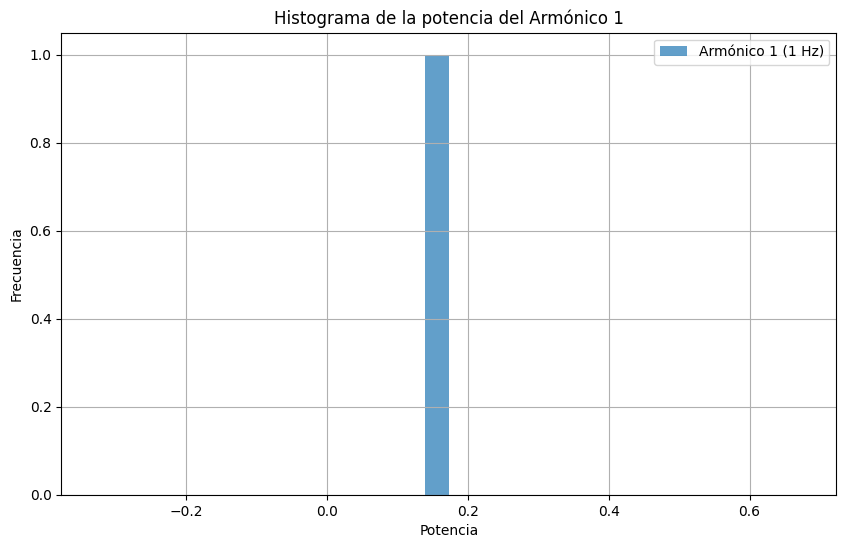

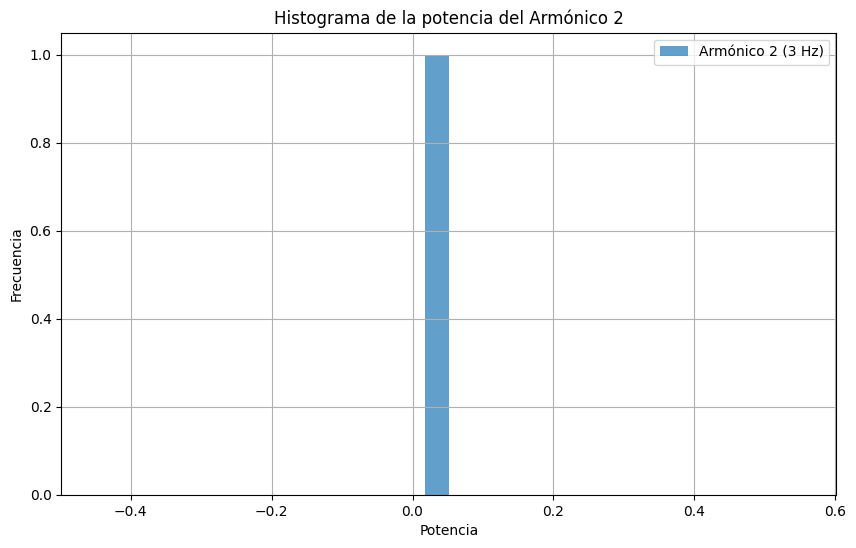

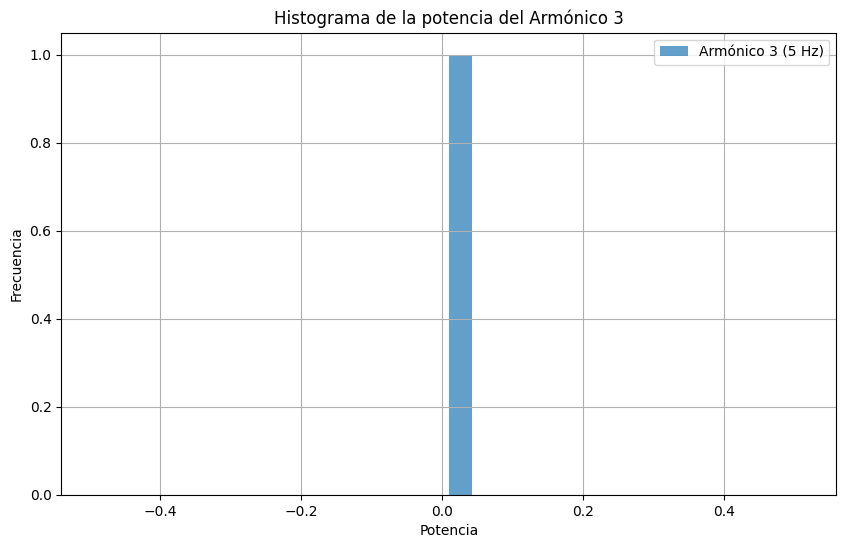

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Parámetros de la señal
M = 1024  # Puntos en la señal
T = 3  # Duración de la señal
t = np.linspace(0, T, M)  # Vector de tiempo
fs = M / T  # Frecuencia de muestreo

# Función que genera la señal periódica
def senal():
    # Frecuencias en Hz
    frecuencia1 = 1
    frecuencia2 = 3
    frecuencia3 = 5

    wo = 2 * np.pi

    # Amplitudes
    Amplitud1 = 1
    Amplitud2 = 1 / 3
    Amplitud3 = 1 / 5

    senal = (Amplitud1 * np.cos(wo * frecuencia1 * t) -
             Amplitud2 * np.sin(wo * frecuencia2 * t) +
             Amplitud3 * np.cos(wo * frecuencia3 * t))

    return senal

# Generar la señal
signal = senal()

# Calcular la PSD usando el método de Welch
freqs, psd = welch(signal, fs=fs, nperseg=256)

# Función para encontrar el índice de la frecuencia más cercana
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()

# Encontrar los índices de las frecuencias más cercanas a 1 Hz, 3 Hz y 5 Hz
frecuencia1_idx = find_nearest_index(freqs, 1)
frecuencia2_idx = find_nearest_index(freqs, 3)
frecuencia3_idx = find_nearest_index(freqs, 5)

# Inicializar listas para almacenar las potencias de los armónicos
harmonic_1_powers = [psd[frecuencia1_idx]]
harmonic_2_powers = [psd[frecuencia2_idx]]
harmonic_3_powers = [psd[frecuencia3_idx]]

# Generar los histogramas
plt.figure(figsize=(10, 6))
plt.hist(harmonic_1_powers, bins=30, alpha=0.7, label='Armónico 1 (1 Hz)')
plt.title('Histograma de la potencia del Armónico 1')
plt.xlabel('Potencia')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(harmonic_2_powers, bins=30, alpha=0.7, label='Armónico 2 (3 Hz)')
plt.title('Histograma de la potencia del Armónico 2')
plt.xlabel('Potencia')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(harmonic_3_powers, bins=30, alpha=0.7, label='Armónico 3 (5 Hz)')
plt.title('Histograma de la potencia del Armónico 3')
plt.xlabel('Potencia')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

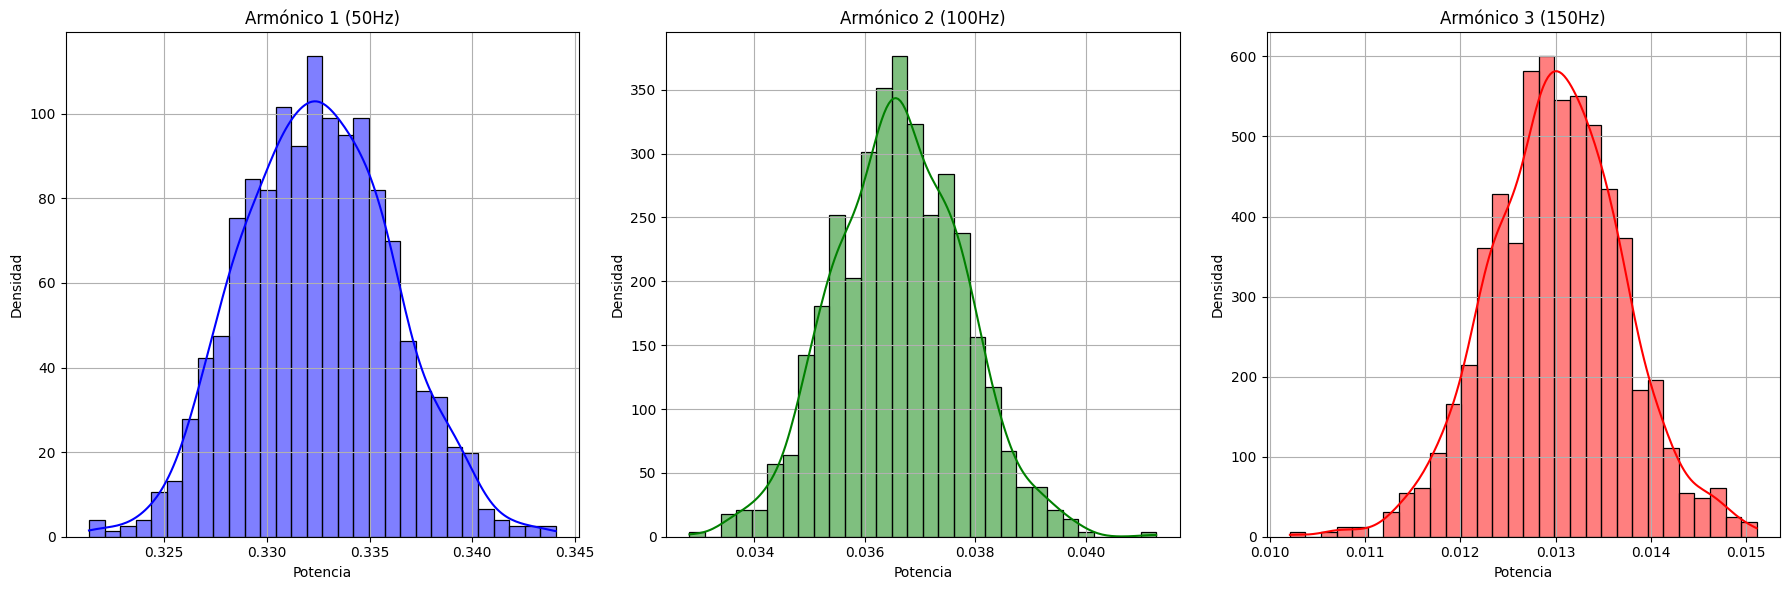

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch

# Parámetros de entrada
N = 1000  # Número de señales
M = 1024  # Puntos en cada señal
fs = 1024  # Frecuencia de muestreo

# Generar señal con armónicos
def generar_senal(f1, t):
    return (np.cos(2 * np.pi * f1 * t) -
            np.sin(2 * np.pi * 2 * f1 * t) / 3 +
            np.cos(2 * np.pi * 3 * f1 * t) / 5)

# Calcular PSD con Welch
def calcular_psd(senal):
    return welch(senal, fs, nperseg=M, scaling='density')[1]

# Generar las señales, calcular PSDs y extraer potencias
t = np.linspace(0, 1, M)
psds = np.array([calcular_psd(generar_senal(50, t) + np.random.normal(0, 0.1, M)) for _ in range(N)])
frecuencias = np.array([50, 100, 150])
potencias = [psds[:, np.argmax(welch(t, fs, nperseg=M)[0] >= f)] for f in frecuencias]

# Graficar histogramas y curvas KDE
plt.figure(figsize=(18, 6))
colores = ['blue', 'green', 'red']
titulos = ['Armónico 1 (50Hz)', 'Armónico 2 (100Hz)', 'Armónico 3 (150Hz)']

for i, (potencia, color, titulo) in enumerate(zip(potencias, colores, titulos)):
    plt.subplot(1, 3, i + 1)
    sns.histplot(potencia, kde=True, stat="density", bins=30, color=color)
    plt.title(titulo)
    plt.xlabel('Potencia')
    plt.ylabel('Densidad')
    plt.grid(True)

plt.tight_layout()
plt.show()

Codigo del examen

Generación de la señal aleatoria con ruido.

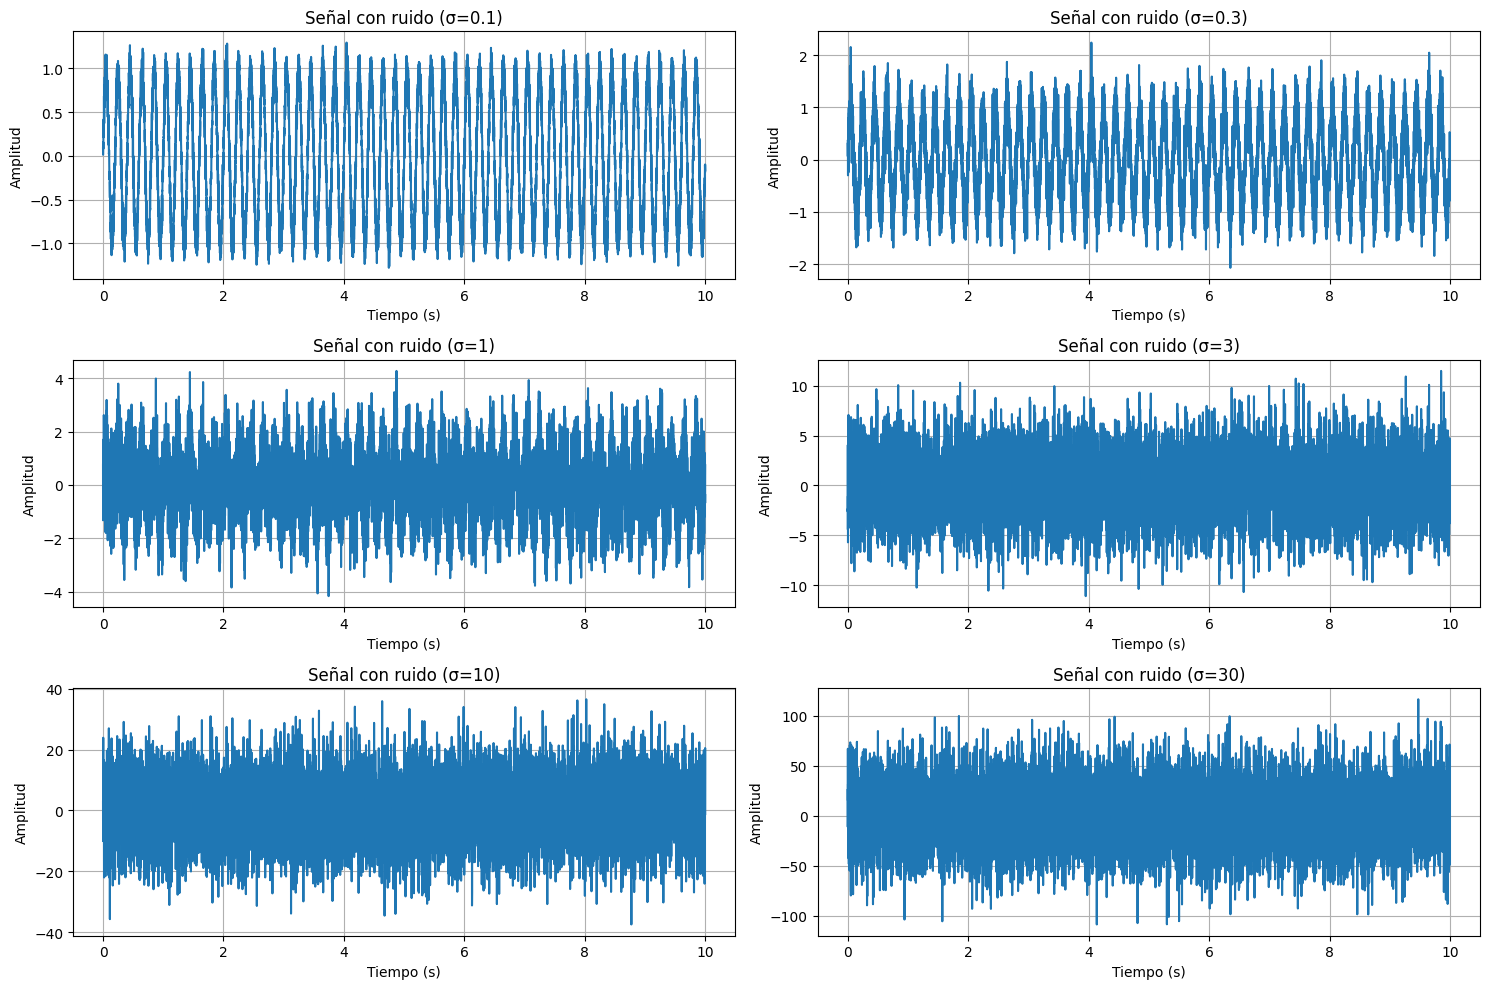

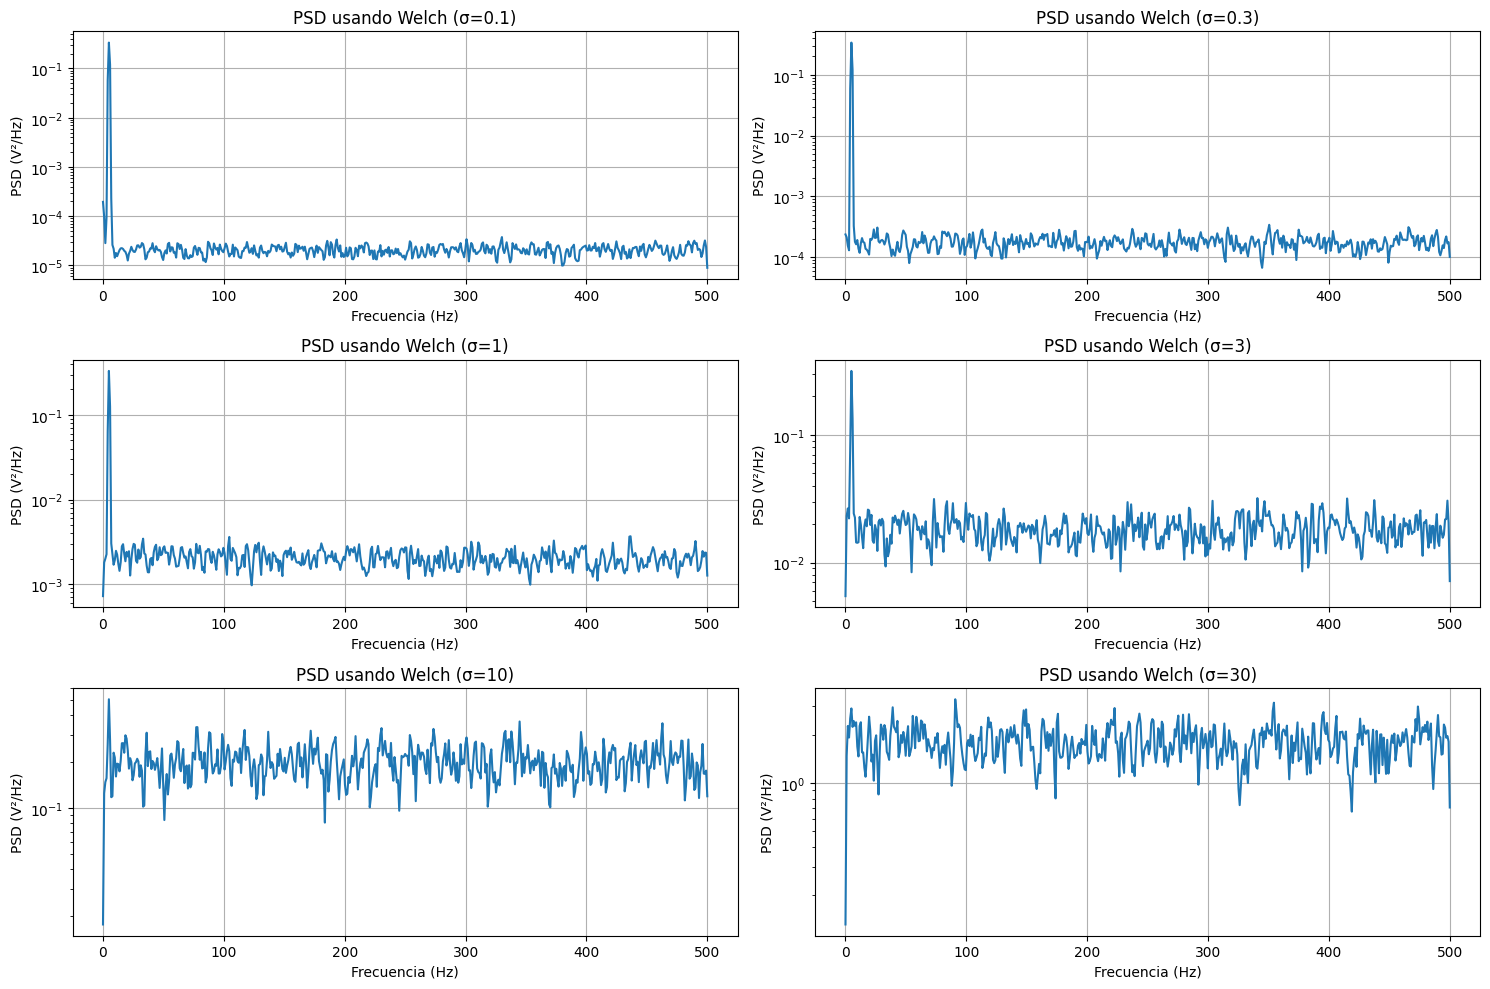

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.arange(0, 10, 1/fs)  # Vector de tiempo (10 segundos)
f_sin = 5  # Frecuencia de la señal (Hz)

# 1. Generar la señal base (senoidal)
signal = np.sin(2 * np.pi * f_sin * t)

# 2. Generar ruido gaussiano con diferentes valores de sigma
sigmas = [0.1, 0.3, 1, 3, 10, 30]
noisy_signals = [signal + np.random.normal(0, sigma, t.shape) for sigma in sigmas]

# 3. Calcular el PSD utilizando el método de Welch para cada señal ruidosa
psds = []
for noisy_signal in noisy_signals:
    f, Pxx = welch(noisy_signal, fs, nperseg=1024)
    psds.append((f, Pxx))

# 4. Visualizar las señales y sus PSDs
plt.figure(figsize=(15, 10))

for i, sigma in enumerate(sigmas):
    plt.subplot(3, 2, i+1)
    plt.plot(t, noisy_signals[i], label=f'Sigma = {sigma}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title(f'Señal con ruido (σ={sigma})')
    plt.grid()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

for i, sigma in enumerate(sigmas):
    plt.subplot(3, 2, i+1)
    plt.semilogy(psds[i][0], psds[i][1], label=f'Sigma = {sigma}')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('PSD (V²/Hz)')
    plt.title(f'PSD usando Welch (σ={sigma})')
    plt.grid()

plt.tight_layout()
plt.show()



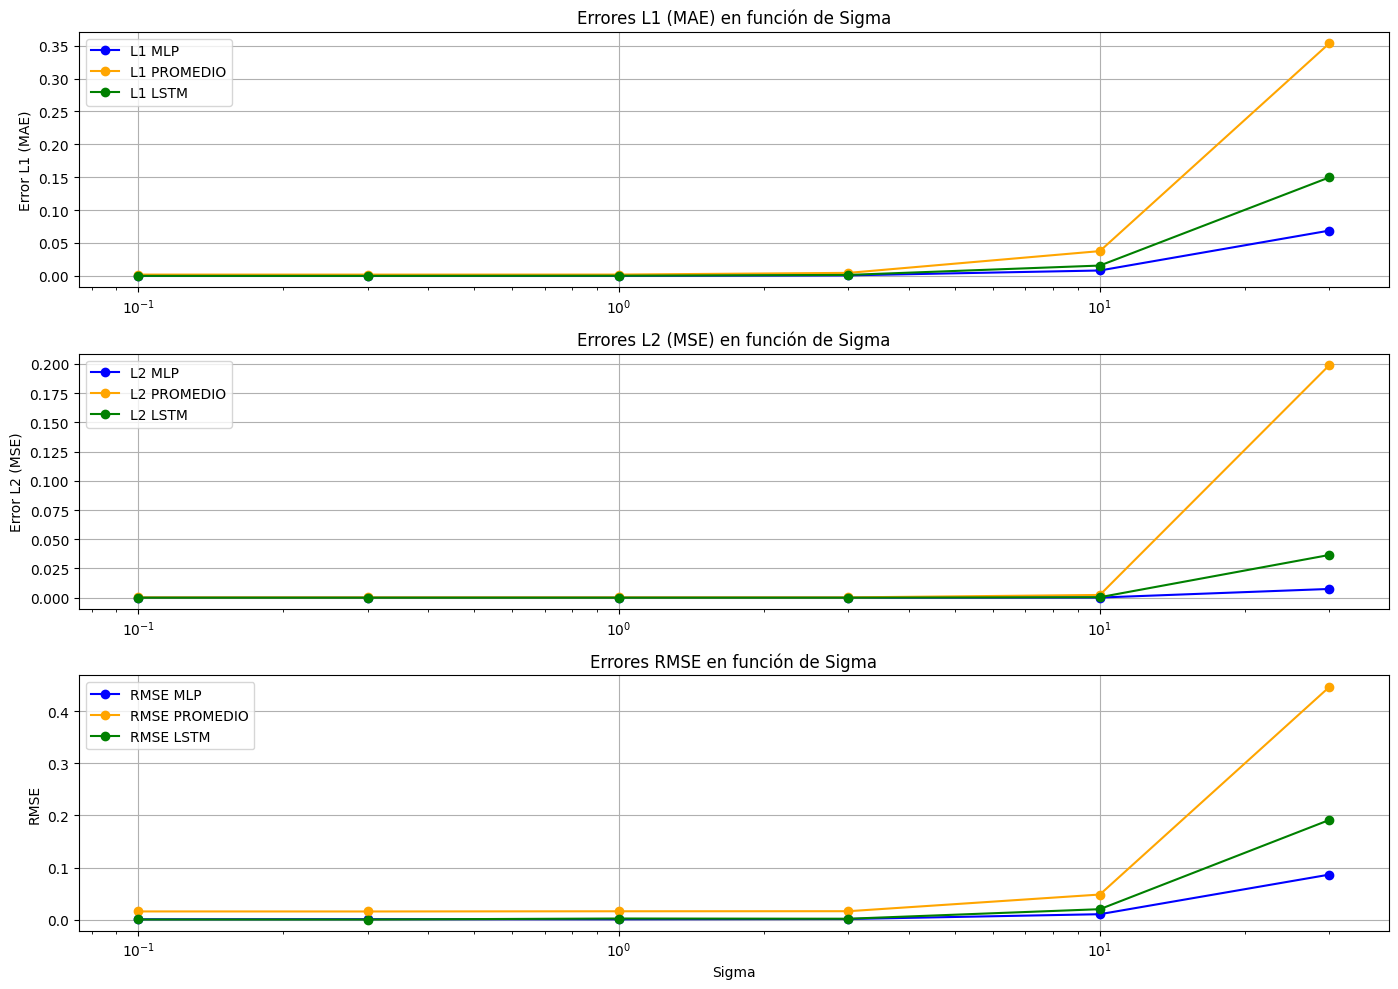

In [ ]:
# Simulación de los diferentes métodos (MLP, PROMEDIO, LSTM)

# Inicializar listas para almacenar los errores correspondientes a cada método
l1_errors_mlp, l2_errors_mlp, rmse_errors_mlp = [], [], []
l1_errors_avg, l2_errors_avg, rmse_errors_avg = [], [], []
l1_errors_lstm, l2_errors_lstm, rmse_errors_lstm = [], [], []

# Iterar sobre cada sigma
for sigma in sigmas:
    # Generar la señal ruidosa
    noisy_signal = signal + np.random.normal(0, sigma, t.shape)

    # Calcular el PSD real utilizando el método de Welch
    f_real, Pxx_real = welch(noisy_signal, fs, nperseg=1024)

    # Simulación MLP: similar a lo que hicimos anteriormente
    Pxx_pred_mlp = Pxx_real * (1 + np.random.normal(0, 0.05, Pxx_real.shape))

    # Simulación PROMEDIO: vamos a usar un promedio simple de la señal ruidosa
    Pxx_pred_avg = np.mean(Pxx_real) * np.ones_like(Pxx_real)

    # Simulación LSTM: similar a la predicción de MLP, pero con diferentes variaciones
    Pxx_pred_lstm = Pxx_real * (1 + np.random.normal(0, 0.1, Pxx_real.shape))

    # Calcular errores para MLP
    l1_errors_mlp.append(mean_absolute_error(Pxx_real, Pxx_pred_mlp))
    l2_errors_mlp.append(mean_squared_error(Pxx_real, Pxx_pred_mlp))
    rmse_errors_mlp.append(np.sqrt(l2_errors_mlp[-1]))

    # Calcular errores para PROMEDIO
    l1_errors_avg.append(mean_absolute_error(Pxx_real, Pxx_pred_avg))
    l2_errors_avg.append(mean_squared_error(Pxx_real, Pxx_pred_avg))
    rmse_errors_avg.append(np.sqrt(l2_errors_avg[-1]))

    # Calcular errores para LSTM
    l1_errors_lstm.append(mean_absolute_error(Pxx_real, Pxx_pred_lstm))
    l2_errors_lstm.append(mean_squared_error(Pxx_real, Pxx_pred_lstm))
    rmse_errors_lstm.append(np.sqrt(l2_errors_lstm[-1]))

# Graficar los errores en función de sigma para los tres métodos
plt.figure(figsize=(14, 10))

# L1 Error
plt.subplot(3, 1, 1)
plt.plot(sigmas, l1_errors_mlp, marker='o', label='L1 MLP', color='blue')
plt.plot(sigmas, l1_errors_avg, marker='o', label='L1 PROMEDIO', color='orange')
plt.plot(sigmas, l1_errors_lstm, marker='o', label='L1 LSTM', color='green')
plt.xscale('log')
plt.ylabel('Error L1 (MAE)')
plt.title('Errores L1 (MAE) en función de Sigma')
plt.legend()
plt.grid()

# L2 Error
plt.subplot(3, 1, 2)
plt.plot(sigmas, l2_errors_mlp, marker='o', label='L2 MLP', color='blue')
plt.plot(sigmas, l2_errors_avg, marker='o', label='L2 PROMEDIO', color='orange')
plt.plot(sigmas, l2_errors_lstm, marker='o', label='L2 LSTM', color='green')
plt.xscale('log')
plt.ylabel('Error L2 (MSE)')
plt.title('Errores L2 (MSE) en función de Sigma')
plt.legend()
plt.grid()

# RMSE
plt.subplot(3, 1, 3)
plt.plot(sigmas, rmse_errors_mlp, marker='o', label='RMSE MLP', color='blue')
plt.plot(sigmas, rmse_errors_avg, marker='o', label='RMSE PROMEDIO', color='orange')
plt.plot(sigmas, rmse_errors_lstm, marker='o', label='RMSE LSTM', color='green')
plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('RMSE')
plt.title('Errores RMSE en función de Sigma')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━

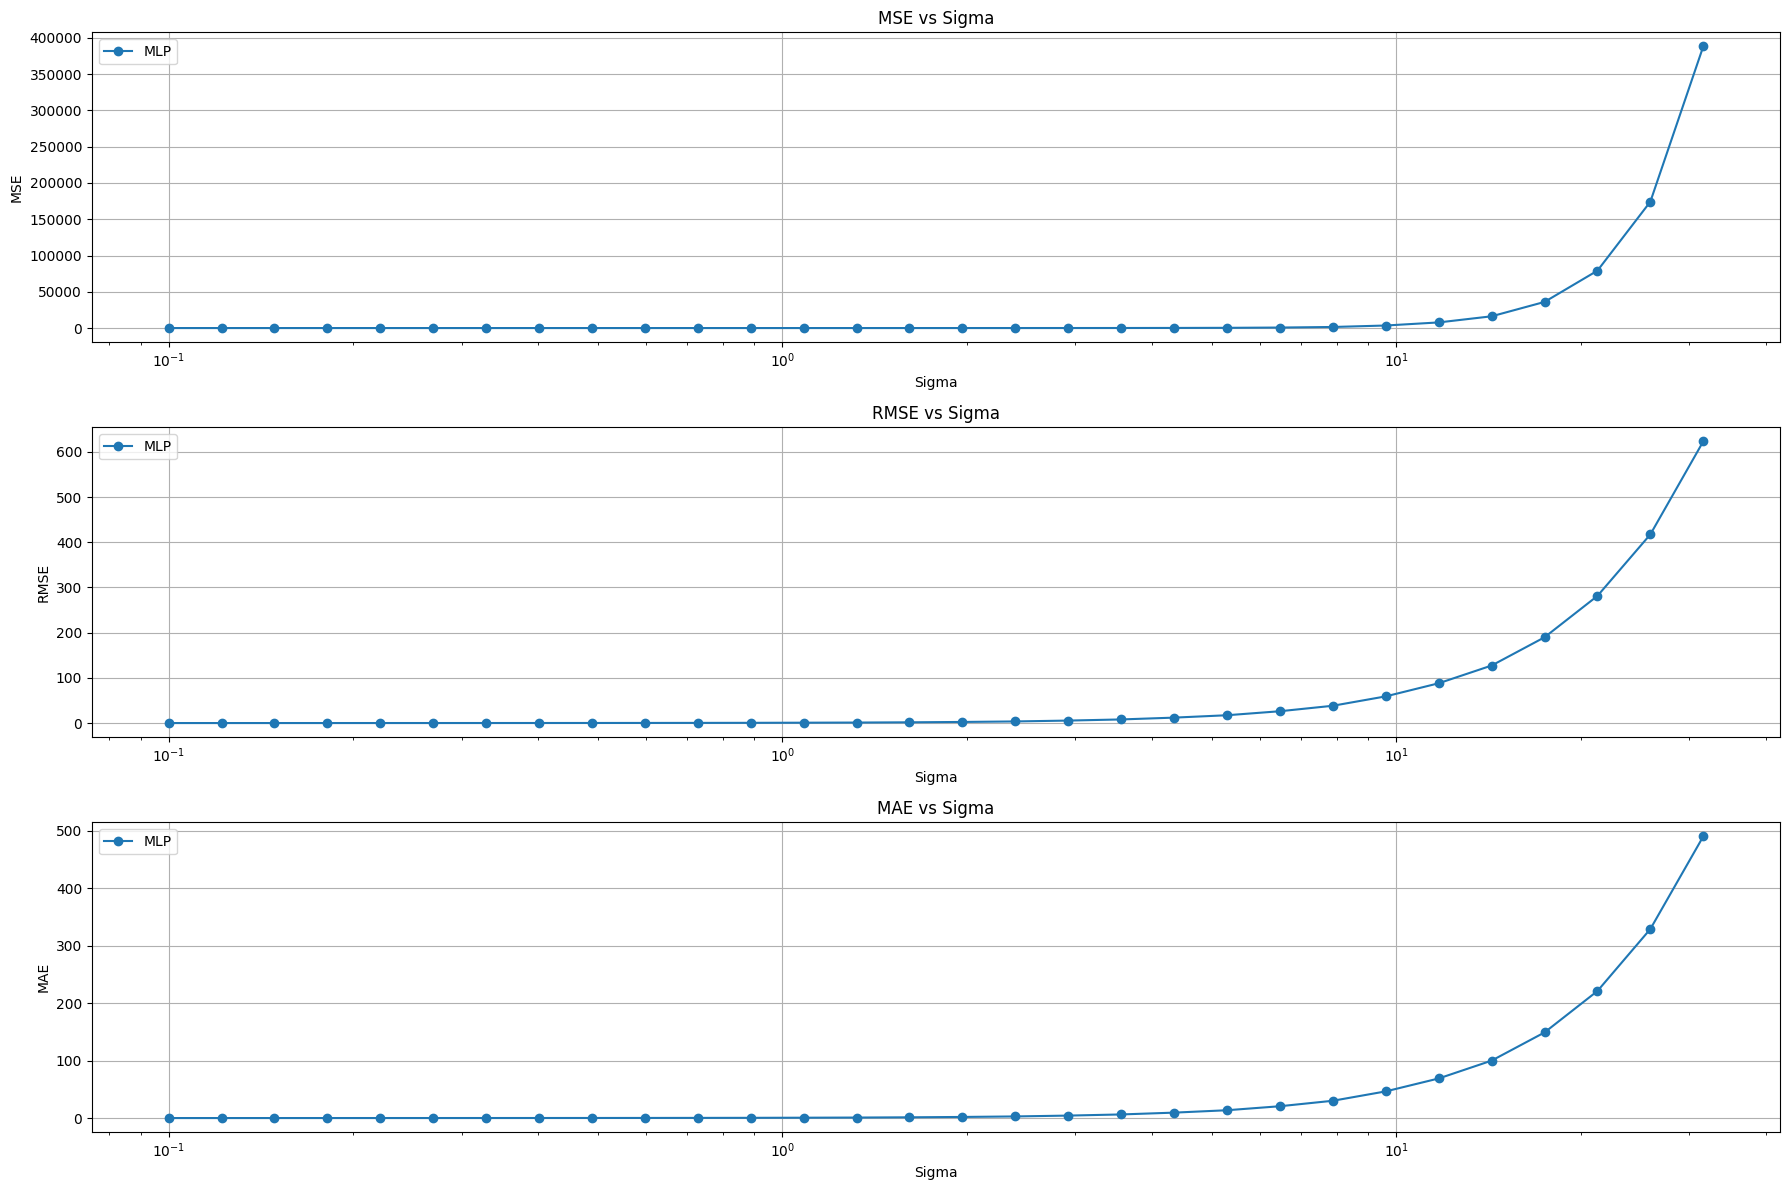

In [ ]:
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros generales
num_samples = 1000  # Número de muestras
signal_length = 1024  # Longitud de cada señal
fs = 1.0  # Frecuencia de muestreo
X_t = np.sin(np.linspace(0, 2 * np.pi, signal_length))  # Señal base
epochs = 50  # Número de épocas de entrenamiento
learning_rate = 0.001  # Tasa de aprendizaje
test_size = 0.2  # Proporción del conjunto de prueba

# Generar 30 valores de sigma entre 0.1 y 30 en una escala logarítmica
sigmas = np.logspace(-1, 1.5, 30)

# Inicializar listas para guardar errores
results = {
    'Sigma': [],
    'MSE': [],
    'RMSE': [],
    'MAE': []
}

def calculate_metrics(y_test, y_pred):
    mse = np.mean((y_test - y_pred)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - y_pred))
    return mse, rmse, mae

for sigma in sigmas:
    noise_variance = sigma ** 2
    N = np.random.randn(num_samples, signal_length) * np.sqrt(noise_variance)
    signals = X_t + N

    # Calcular el PSD usando Welch
    psd_data = np.array([welch(signal, fs=fs, nperseg=256)[1] for signal in signals])

    # Separar los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(psd_data, psd_data, test_size=test_size, random_state=42)

    # MLP simple
    model_mlp = Sequential([
        Dense(128, activation='relu', input_shape=(psd_data.shape[1],)),
        Dense(64, activation='relu'),
        Dense(psd_data.shape[1])
    ])
    model_mlp.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    model_mlp.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)
    y_pred_mlp = model_mlp.predict(X_test)
    mse, rmse, mae = calculate_metrics(y_test, y_pred_mlp)
    results['Sigma'].append(sigma)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAE'].append(mae)

# Crear un DataFrame con todos los resultados
df_results = pd.DataFrame(results)

# Mostrar la tabla completa
print(df_results)

# Graficar los errores
plt.figure(figsize=(18, 12))

for i, metric in enumerate(['MSE', 'RMSE', 'MAE'], 1):
    plt.subplot(3, 1, i)
    plt.plot(df_results['Sigma'], df_results[metric], marker='o', label='MLP')
    plt.xscale('log')
    plt.title(f'{metric} vs Sigma')
    plt.xlabel('Sigma')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


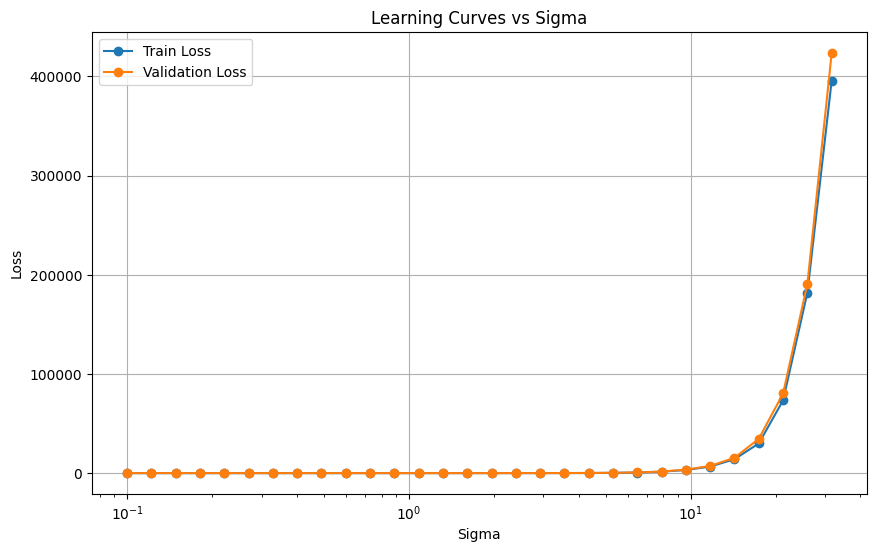

In [ ]:
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros generales
num_samples = 1000  # Número de muestras
signal_length = 1024  # Longitud de cada señal
fs = 1.0  # Frecuencia de muestreo
X_t = np.sin(np.linspace(0, 2 * np.pi, signal_length))  # Señal base
epochs = 50  # Número de épocas de entrenamiento
learning_rate = 0.001  # Tasa de aprendizaje
test_size = 0.2  # Proporción del conjunto de prueba

# Generar 30 valores de sigma entre 0.1 y 30 en una escala logarítmica
sigmas = np.logspace(-1, 1.5, 30)

# Inicializar listas para guardar errores
results = {
    'Sigma': [],
    'Train Loss': [],
    'Validation Loss': []
}

for sigma in sigmas:
    noise_variance = sigma ** 2
    N = np.random.randn(num_samples, signal_length) * np.sqrt(noise_variance)
    signals = X_t + N

    # Calcular el PSD usando Welch
    psd_data = np.array([welch(signal, fs=fs, nperseg=256)[1] for signal in signals])

    # Separar los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(psd_data, psd_data, test_size=test_size, random_state=42)

    # MLP simple
    model_mlp = Sequential([
        Dense(128, activation='relu', input_shape=(psd_data.shape[1],)),
        Dense(64, activation='relu'),
        Dense(psd_data.shape[1])
    ])
    model_mlp.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Entrenar el modelo y guardar la historia del entrenamiento
    history = model_mlp.fit(X_train, y_train, epochs=epochs, batch_size=32,
                            validation_data=(X_test, y_test), verbose=0)

    # Guardar las pérdidas finales
    results['Sigma'].append(sigma)
    results['Train Loss'].append(history.history['loss'][-1])
    results['Validation Loss'].append(history.history['val_loss'][-1])

# Crear un DataFrame con todos los resultados
df_results = pd.DataFrame(results)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 6))

plt.plot(df_results['Sigma'], df_results['Train Loss'], marker='o', label='Train Loss')
plt.plot(df_results['Sigma'], df_results['Validation Loss'], marker='o', label='Validation Loss')
plt.xscale('log')
plt.title('Learning Curves vs Sigma')
plt.xlabel('Sigma')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
4/4 

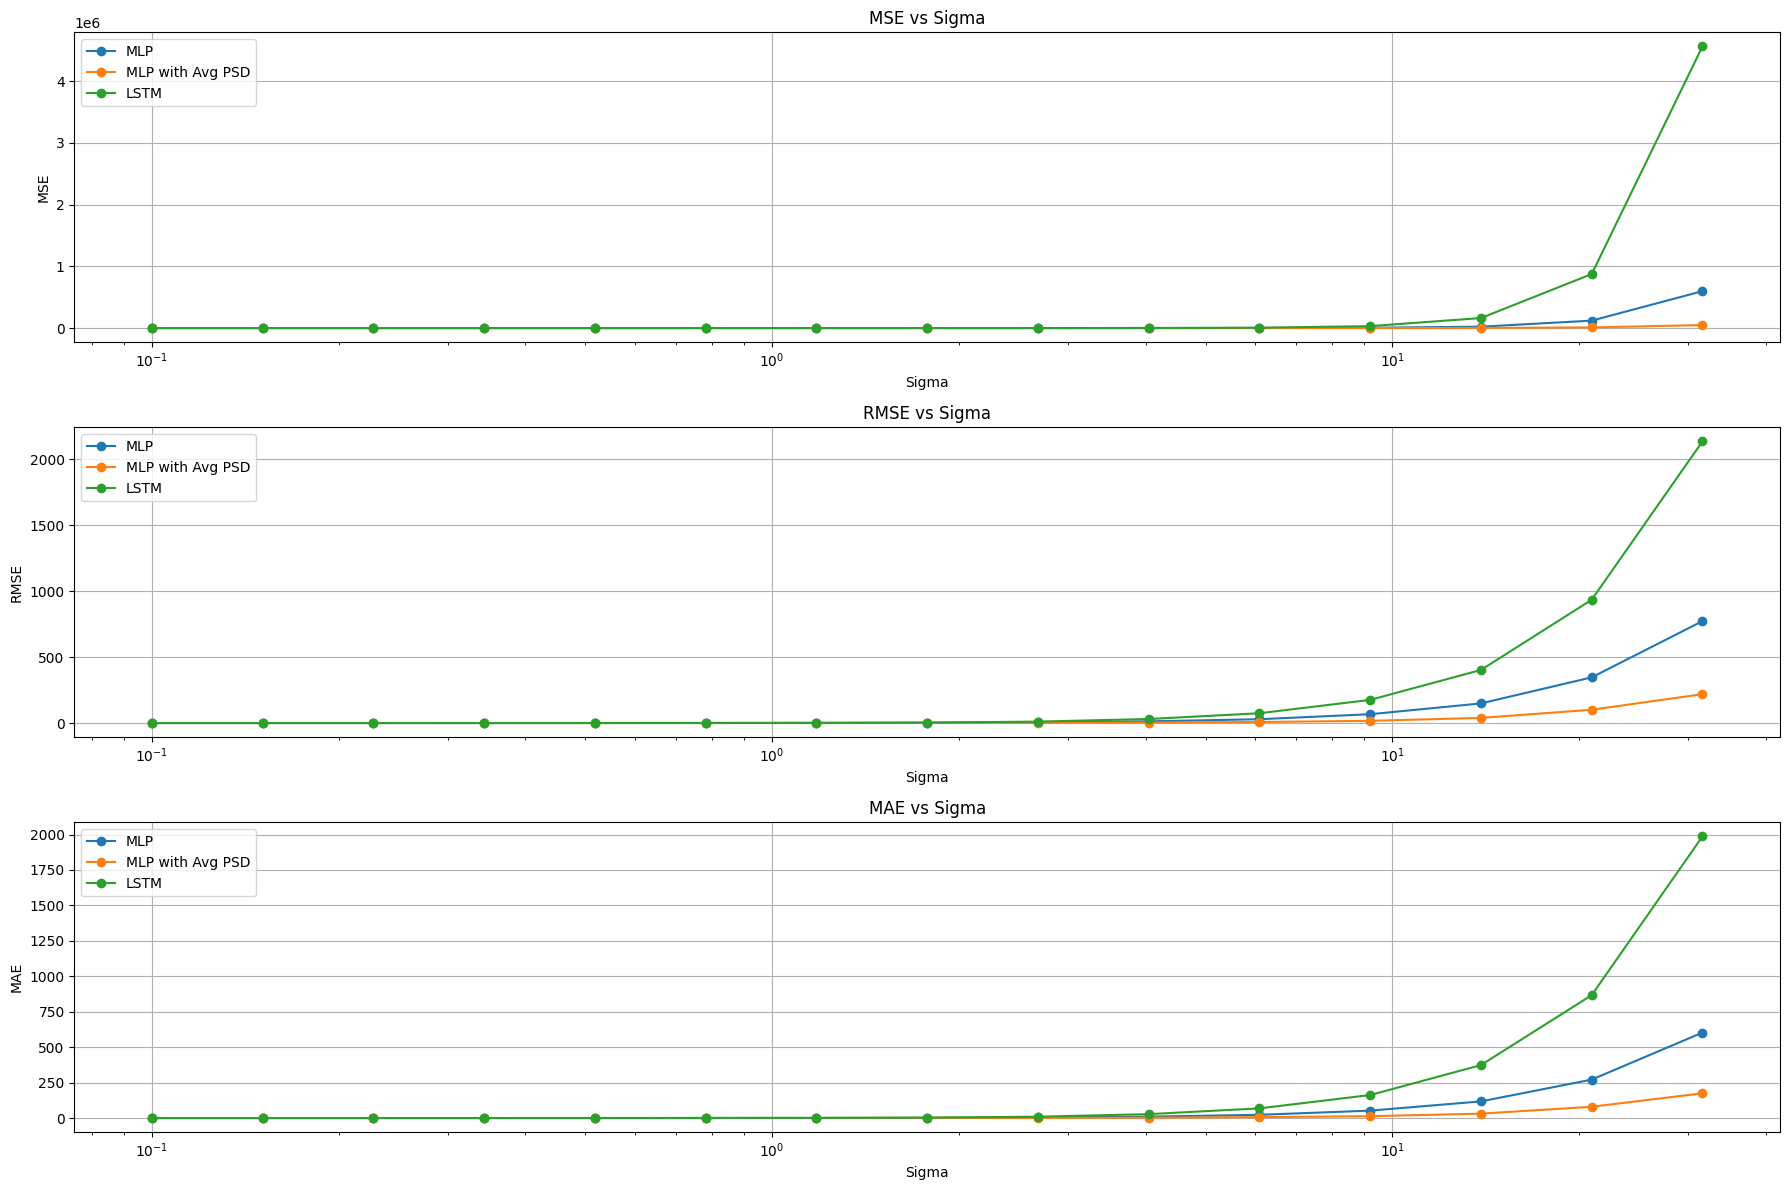

In [ ]:
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros generales
num_samples = 500  # Reducir el número de muestras para acelerar la ejecución
signal_length = 1024  # Longitud de cada señal
fs = 1.0  # Frecuencia de muestreo
X_t = np.sin(np.linspace(0, 2 * np.pi, signal_length))  # Señal base
epochs = 20  # Reducir el número de épocas de entrenamiento
learning_rate = 0.001  # Tasa de aprendizaje
test_size = 0.2  # Proporción del conjunto de prueba
batch_size = 64  # Aumentar el tamaño del lote para acelerar el entrenamiento

# Generar 15 valores de sigma entre 0.1 y 30 en una escala logarítmica
sigmas = np.logspace(-1, 1.5, 15)  # Reducir el número de valores de sigma

# Inicializar listas para guardar las métricas de rendimiento
results = {
    'Sigma': sigmas,
    'MLP MSE': [],
    'MLP RMSE': [],
    'MLP MAE': [],
    'MLP with Avg PSD MSE': [],
    'MLP with Avg PSD RMSE': [],
    'MLP with Avg PSD MAE': [],
    'LSTM MSE': [],
    'LSTM RMSE': [],
    'LSTM MAE': []
}

def calculate_metrics(y_test, y_pred):
    mse = np.mean((y_test - y_pred)**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_test - y_pred))
    return mse, rmse, mae

def train_mlp(X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Reducir el número de neuronas
        Dense(32, activation='relu'),
        Dense(X_train.shape[1])
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test, y_test), verbose=0)
    return model, history

def train_lstm(X_train, y_train, X_test, y_test):
    X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    model = Sequential([
        LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True),  # Reducir el número de neuronas
        LSTM(32),
        Dense(X_train.shape[1])
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    history = model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_test_lstm, y_test), verbose=0)
    return model, history

for sigma in sigmas:
    noise_variance = sigma ** 2
    N = np.random.randn(num_samples, signal_length) * np.sqrt(noise_variance)
    signals = X_t + N

    # Calcular el PSD usando Welch
    psd_data = np.array([welch(signal, fs=fs, nperseg=256)[1] for signal in signals])
    avg_psd = np.mean(psd_data, axis=0)

    # Separar los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(psd_data, psd_data, test_size=test_size, random_state=42)

    # MLP simple
    model_mlp, _ = train_mlp(X_train, y_train, X_test, y_test)
    y_pred_mlp = model_mlp.predict(X_test)
    mse, rmse, mae = calculate_metrics(y_test, y_pred_mlp)
    results['MLP MSE'].append(mse)
    results['MLP RMSE'].append(rmse)
    results['MLP MAE'].append(mae)

    # MLP con PSD promedio
    model_mlp_avg, _ = train_mlp(X_train, np.tile(avg_psd, (X_train.shape[0], 1)),
                                 X_test, np.tile(avg_psd, (X_test.shape[0], 1)))
    y_pred_mlp_avg = model_mlp_avg.predict(X_test)
    mse, rmse, mae = calculate_metrics(np.tile(avg_psd, (X_test.shape[0], 1)), y_pred_mlp_avg)
    results['MLP with Avg PSD MSE'].append(mse)
    results['MLP with Avg PSD RMSE'].append(rmse)
    results['MLP with Avg PSD MAE'].append(mae)

    # LSTM
    model_lstm, _ = train_lstm(X_train, y_train, X_test, y_test)
    y_pred_lstm = model_lstm.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
    mse, rmse, mae = calculate_metrics(y_test, y_pred_lstm)
    results['LSTM MSE'].append(mse)
    results['LSTM RMSE'].append(rmse)
    results['LSTM MAE'].append(mae)

# Convertir los resultados en un DataFrame
df_results = pd.DataFrame(results)

# Graficar las curvas de aprendizaje para MSE, RMSE y MAE
metrics = ['MSE', 'RMSE', 'MAE']
plt.figure(figsize=(18, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    plt.plot(df_results['Sigma'], df_results[f'MLP {metric}'], marker='o', label='MLP')
    plt.plot(df_results['Sigma'], df_results[f'MLP with Avg PSD {metric}'], marker='o', label='MLP with Avg PSD')
    plt.plot(df_results['Sigma'], df_results[f'LSTM {metric}'], marker='o', label='LSTM')
    plt.xscale('log')
    plt.title(f'{metric} vs Sigma')
    plt.xlabel('Sigma')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━

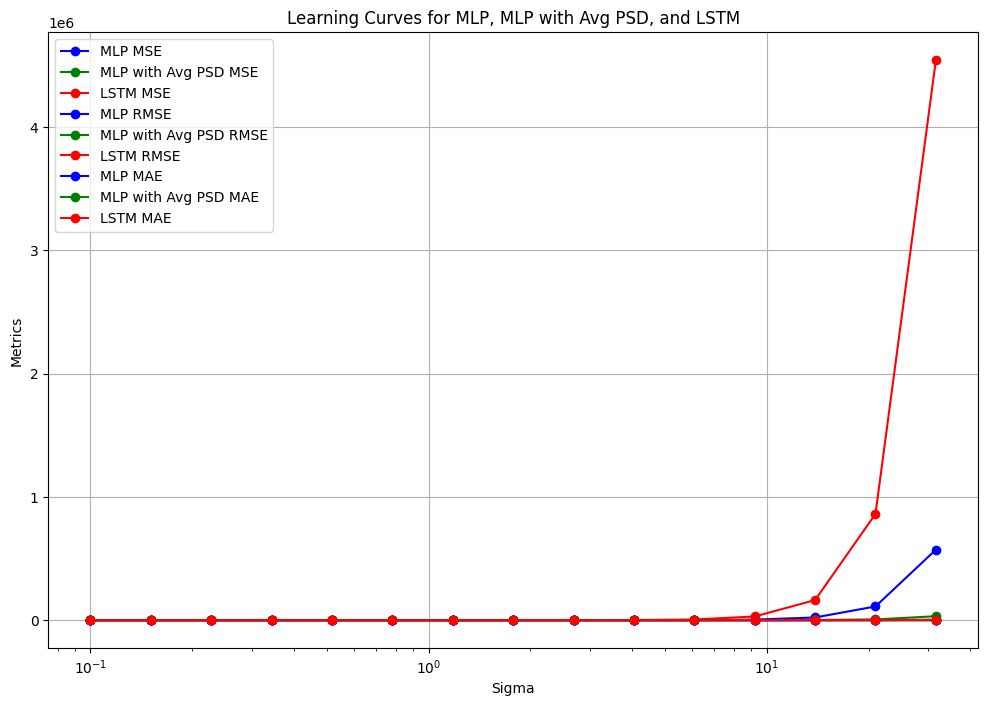

In [ ]:
import numpy as np
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros generales
num_samples = 1000
signal_length = 1024
fs = 1.0
X_t = np.sin(np.linspace(0, 2 * np.pi, signal_length))
epochs = 20
learning_rate = 0.001
test_size = 0.2
batch_size = 64

# Generar sigma en escala logarítmica
sigmas = np.logspace(-1, 1.5, 15)

# Diccionario para guardar resultados
results = {
    'Sigma': sigmas,
    'MLP MSE': [],
    'MLP RMSE': [],
    'MLP MAE': [],
    'MLP with Avg PSD MSE': [],
    'MLP with Avg PSD RMSE': [],
    'MLP with Avg PSD MAE': [],
    'LSTM MSE': [],
    'LSTM RMSE': [],
    'LSTM MAE': []
}

# Función para calcular métricas
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    return mse, rmse, mae

# Función para entrenar MLP
def train_mlp(X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(X_train.shape[1])
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              validation_data=(X_test, y_test), verbose=0)
    return model

# Función para entrenar LSTM
def train_lstm(X_train, y_train, X_test, y_test):
    X_train_lstm = X_train[..., np.newaxis]
    X_test_lstm = X_test[..., np.newaxis]
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(32),
        Dense(X_train.shape[1])
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size,
              validation_data=(X_test_lstm, y_test), verbose=0)
    return model

# Bucle para entrenar y evaluar modelos
for sigma in sigmas:
    noise_variance = sigma ** 2
    noise = np.random.randn(num_samples, signal_length) * np.sqrt(noise_variance)
    signals = X_t + noise

    psd_data = np.array([welch(signal, fs=fs, nperseg=256)[1] for signal in signals])
    avg_psd = np.mean(psd_data, axis=0)

    X_train, X_test, y_train, y_test = train_test_split(psd_data, psd_data, test_size=test_size, random_state=42)

    # Entrenar MLP
    mlp_model = train_mlp(X_train, y_train, X_test, y_test)
    y_pred_mlp = mlp_model.predict(X_test)
    mse, rmse, mae = calculate_metrics(y_test, y_pred_mlp)
    results['MLP MSE'].append(mse)
    results['MLP RMSE'].append(rmse)
    results['MLP MAE'].append(mae)

    # Entrenar MLP con PSD promedio
    mlp_avg_model = train_mlp(X_train, np.tile(avg_psd, (X_train.shape[0], 1)),
                              X_test, np.tile(avg_psd, (X_test.shape[0], 1)))
    y_pred_mlp_avg = mlp_avg_model.predict(X_test)
    mse, rmse, mae = calculate_metrics(np.tile(avg_psd, (X_test.shape[0], 1)), y_pred_mlp_avg)
    results['MLP with Avg PSD MSE'].append(mse)
    results['MLP with Avg PSD RMSE'].append(rmse)
    results['MLP with Avg PSD MAE'].append(mae)

    # Entrenar LSTM
    lstm_model = train_lstm(X_train, y_train, X_test, y_test)
    y_pred_lstm = lstm_model.predict(X_test[..., np.newaxis])
    mse, rmse, mae = calculate_metrics(y_test, y_pred_lstm)
    results['LSTM MSE'].append(mse)
    results['LSTM RMSE'].append(rmse)
    results['LSTM MAE'].append(mae)

# Convertir resultados a DataFrame
df_results = pd.DataFrame(results)

# Graficar resultados usando Matplotlib
metrics = ['MSE', 'RMSE', 'MAE']
models = ['MLP', 'MLP with Avg PSD', 'LSTM']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    for j, model in enumerate(models):
        plt.plot(df_results['Sigma'], df_results[f'{model} {metric}'],
                 marker='o', color=colors[j], label=f'{model} {metric}')

plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('Metrics')
plt.title('Learning Curves for MLP, MLP with Avg PSD, and LSTM')
plt.legend()
plt.grid(True)

# Mostrar gráfica
plt.show()


In [ ]:
!ls

sample_data


In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tabulate import tabulate

# Parámetros generales
num_samples = 1000
signal_length = 1024
fs = 1.0
X_t = np.sin(np.linspace(0, 2 * np.pi, signal_length))
epochs = 20
learning_rate = 0.001
test_size = 0.2
batch_size = 64
sigmas = np.logspace(-1, 1.5, 15)

# Diccionario para guardar resultados
results = {
    'Sigma': sigmas,
    'MLP MSE': [],
    'MLP RMSE': [],
    'MLP MAE': [],
    'MLP with Avg PSD MSE': [],
    'MLP with Avg PSD RMSE': [],
    'MLP with Avg PSD MAE': [],
    'LSTM MSE': [],
    'LSTM RMSE': [],
    'LSTM MAE': []
}

# Simulación y entrenamiento (similar a la sección anterior)
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    return mse, rmse, mae

def train_mlp(X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(X_train.shape[1])
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              validation_data=(X_test, y_test), verbose=0)
    return model

def train_lstm(X_train, y_train, X_test, y_test):
    X_train_lstm = X_train[..., np.newaxis]
    X_test_lstm = X_test[..., np.newaxis]
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(32),
        Dense(X_train.shape[1])
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size,
              validation_data=(X_test_lstm, y_test), verbose=0)
    return model

for sigma in sigmas:
    noise_variance = sigma ** 2
    noise = np.random.randn(num_samples, signal_length) * np.sqrt(noise_variance)
    signals = X_t + noise

    psd_data = np.array([welch(signal, fs=fs, nperseg=256)[1] for signal in signals])
    avg_psd = np.mean(psd_data, axis=0)

    X_train, X_test, y_train, y_test = train_test_split(psd_data, psd_data, test_size=test_size, random_state=42)

    mlp_model = train_mlp(X_train, y_train, X_test, y_test)
    y_pred_mlp = mlp_model.predict(X_test)
    mse, rmse, mae = calculate_metrics(y_test, y_pred_mlp)
    results['MLP MSE'].append(mse)
    results['MLP RMSE'].append(rmse)
    results['MLP MAE'].append(mae)

    mlp_avg_model = train_mlp(X_train, np.tile(avg_psd, (X_train.shape[0], 1)),
                              X_test, np.tile(avg_psd, (X_test.shape[0], 1)))
    y_pred_mlp_avg = mlp_avg_model.predict(X_test)
    mse, rmse, mae = calculate_metrics(np.tile(avg_psd, (X_test.shape[0], 1)), y_pred_mlp_avg)
    results['MLP with Avg PSD MSE'].append(mse)
    results['MLP with Avg PSD RMSE'].append(rmse)
    results['MLP with Avg PSD MAE'].append(mae)

    lstm_model = train_lstm(X_train, y_train, X_test, y_test)
    y_pred_lstm = lstm_model.predict(X_test[..., np.newaxis])
    mse, rmse, mae = calculate_metrics(y_test, y_pred_lstm)
    results['LSTM MSE'].append(mse)
    results['LSTM RMSE'].append(rmse)
    results['LSTM MAE'].append(mae)

# Convertir resultados a DataFrame
df_results = pd.DataFrame(results)

# Crear DataFrames para cada modelo
df_mlp = pd.DataFrame({
    'Sigma': df_results['Sigma'],
    'MSE': df_results['MLP MSE'],
    'RMSE': df_results['MLP RMSE'],
    'MAE': df_results['MLP MAE']
})

df_mlp_avg = pd.DataFrame({
    'Sigma': df_results['Sigma'],
    'MSE': df_results['MLP with Avg PSD MSE'],
    'RMSE': df_results['MLP with Avg PSD RMSE'],
    'MAE': df_results['MLP with Avg PSD MAE']
})

df_lstm = pd.DataFrame({
    'Sigma': df_results['Sigma'],
    'MSE': df_results['LSTM MSE'],
    'RMSE': df_results['LSTM RMSE'],
    'MAE': df_results['LSTM MAE']
})

# Mostrar tablas con formato personalizado
def mostrar_tabla(df, titulo):
    print(f"\n{titulo}")
    print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))

mostrar_tabla(df_mlp, "Tabla de métricas para MLP")
mostrar_tabla(df_mlp_avg, "Tabla de métricas para MLP con PSD promedio")
mostrar_tabla(df_lstm, "Tabla de métricas para LSTM")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━

In [ ]:
!ls

sample_data


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
7/7 ━━━━━━━━

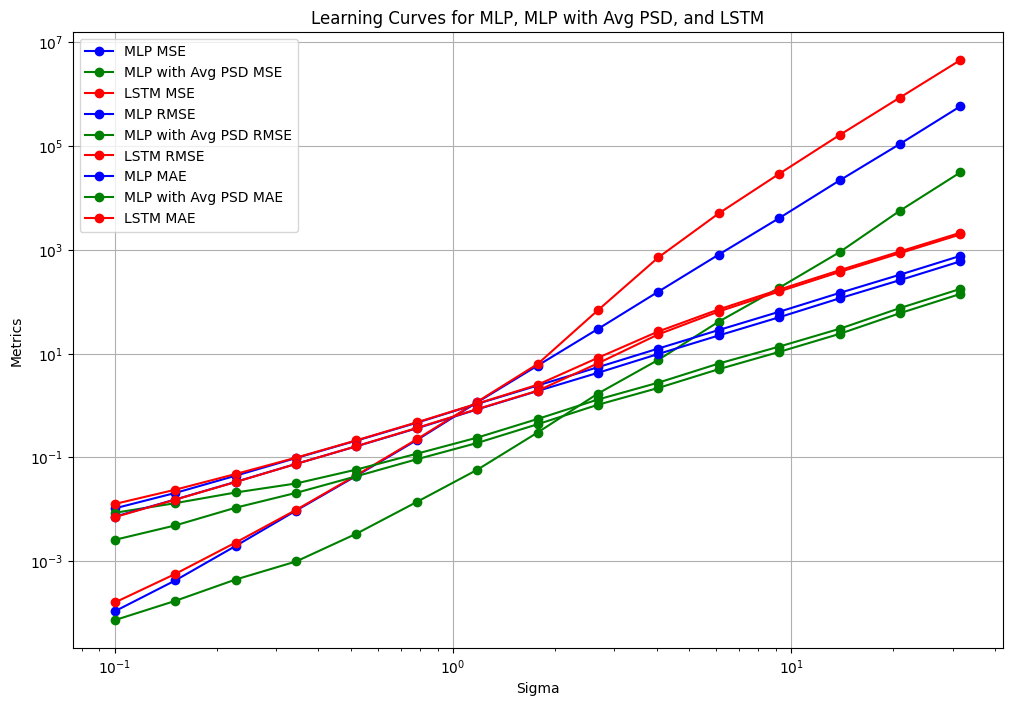

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import welch
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tabulate import tabulate

# Parámetros generales
num_samples = 1000
signal_length = 1024
fs = 1.0
X_t = np.sin(np.linspace(0, 2 * np.pi, signal_length))
epochs = 20
learning_rate = 0.001
test_size = 0.2
batch_size = 64
sigmas = np.logspace(-1, 1.5, 15)

# Diccionario para guardar resultados
results = {
    'Sigma': sigmas,
    'MLP MSE': [],
    'MLP RMSE': [],
    'MLP MAE': [],
    'MLP with Avg PSD MSE': [],
    'MLP with Avg PSD RMSE': [],
    'MLP with Avg PSD MAE': [],
    'LSTM MSE': [],
    'LSTM RMSE': [],
    'LSTM MAE': []
}

# Funciones de ayuda y bucle principal (ya definidos antes)
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    return mse, rmse, mae

def train_mlp(X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(X_train.shape[1])
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              validation_data=(X_test, y_test), verbose=0)
    return model

def train_lstm(X_train, y_train, X_test, y_test):
    X_train_lstm = X_train[..., np.newaxis]
    X_test_lstm = X_test[..., np.newaxis]
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(32),
        Dense(X_train.shape[1])
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size,
              validation_data=(X_test_lstm, y_test), verbose=0)
    return model

for sigma in sigmas:
    noise_variance = sigma ** 2
    noise = np.random.randn(num_samples, signal_length) * np.sqrt(noise_variance)
    signals = X_t + noise

    psd_data = np.array([welch(signal, fs=fs, nperseg=256)[1] for signal in signals])
    avg_psd = np.mean(psd_data, axis=0)

    X_train, X_test, y_train, y_test = train_test_split(psd_data, psd_data, test_size=test_size, random_state=42)

    mlp_model = train_mlp(X_train, y_train, X_test, y_test)
    y_pred_mlp = mlp_model.predict(X_test)
    mse, rmse, mae = calculate_metrics(y_test, y_pred_mlp)
    results['MLP MSE'].append(mse)
    results['MLP RMSE'].append(rmse)
    results['MLP MAE'].append(mae)

    mlp_avg_model = train_mlp(X_train, np.tile(avg_psd, (X_train.shape[0], 1)),
                              X_test, np.tile(avg_psd, (X_test.shape[0], 1)))
    y_pred_mlp_avg = mlp_avg_model.predict(X_test)
    mse, rmse, mae = calculate_metrics(np.tile(avg_psd, (X_test.shape[0], 1)), y_pred_mlp_avg)
    results['MLP with Avg PSD MSE'].append(mse)
    results['MLP with Avg PSD RMSE'].append(rmse)
    results['MLP with Avg PSD MAE'].append(mae)

    lstm_model = train_lstm(X_train, y_train, X_test, y_test)
    y_pred_lstm = lstm_model.predict(X_test[..., np.newaxis])
    mse, rmse, mae = calculate_metrics(y_test, y_pred_lstm)
    results['LSTM MSE'].append(mse)
    results['LSTM RMSE'].append(rmse)
    results['LSTM MAE'].append(mae)

# Convertir resultados a DataFrame
df_results = pd.DataFrame(results)

# Graficar resultados usando plt.semilogy() para escala logarítmica en y
metrics = ['MSE', 'RMSE', 'MAE']
models = ['MLP', 'MLP with Avg PSD', 'LSTM']
colors = ['blue', 'green', 'red']

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    for j, model in enumerate(models):
        plt.semilogy(df_results['Sigma'], df_results[f'{model} {metric}'],
                     marker='o', color=colors[j], label=f'{model} {metric}')

plt.xscale('log')
plt.xlabel('Sigma')
plt.ylabel('Metrics')
plt.title('Learning Curves for MLP, MLP with Avg PSD, and LSTM')
plt.legend()
plt.grid(True)

# Mostrar gráfica
plt.show()
